In [46]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt


data=pd.read_csv('baza_danych.csv',encoding='ISO-8859-1')
data.rename(columns={'iyear':'Year','imonth':'Month','country_txt':'Country',},inplace=True)

data.head(10)


,Year,Month,Country,region_txt,targtype1_txt
0,1970,7,Dominican Republic,Central America & Caribbean,Private Citizens & Property
1,1970,0,Mexico,North America,Government (Diplomatic)
2,1970,1,Philippines,Southeast Asia,Journalists & Media
3,1970,1,Greece,Western Europe,Government (Diplomatic)
4,1970,1,Japan,East Asia,Government (Diplomatic)
5,1970,1,United States,North America,Police
6,1970,1,Uruguay,South America,Police
7,1970,1,United States,North America,Utilities
8,1970,1,United States,North America,Military
9,1970,1,United States,North America,Government (General)


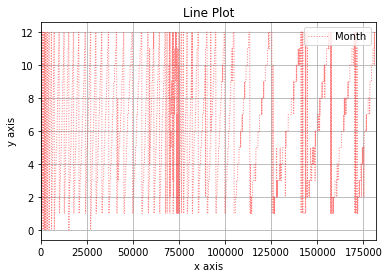

In [9]:
data.Month.plot(kind = 'line', color = 'r',label = 'Month',linewidth=1,alpha = 0.5,grid = True,linestyle = ':')
plt.legend(loc='upper right')     # legend = puts label into plot
plt.xlabel('x axis')              # label = name of label
plt.ylabel('y axis')
plt.title('Line Plot')            # title = title of plot
plt.show()

In [38]:

N_America=0
E_America=0
W_America=0
S_America=0
N_E=0
S_E=0
E_E=0
W_E=0


for item in data.region_txt:
    if item == "North America":
        N_America=N_America+1
    if item == "East America":
        E_America=E_America+1
    if item == "West America":
        W_America=W_America+1
    if item == "South America":
        S_America=S_America+1
    if item == "South America":
        S_America=S_America+1   
    if item == "Northeast Europe":
        N_E=N_E+1
    if item == "South Europe":
        S_E=S_E+1  
    if item == "East Europe":
        E_E=E_E+1
    if item == "Western Europe":
        W_E=W_E+1  
        
lista = [N_America, E_America, W_America, S_America ]  
lista2= [N_E, E_E, W_E, S_E]


Text(0, 0.5, 'Ilosc atakow')

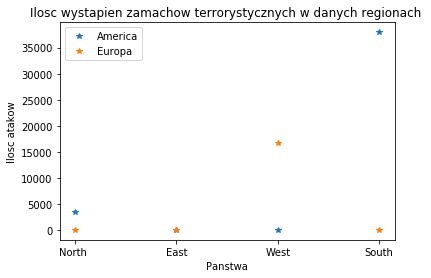

In [42]:
#x = [1,2,3,4]
x=["North ","East", "West", "South"]
plt.plot(x, lista, '*', label = 'America')
plt.plot(x, lista2, '*', label = 'Europa')
plt.legend(loc='upper left') 
plt.title('Ilosc wystapien zamachow terrorystycznych w danych regionach ');
plt.xlabel('Panstwa')              # label = name of label
plt.ylabel("Ilosc atakow")

In [52]:
target_codes = []

for attack in data.targtype1_txt:
    if attack in ['Business', 'Journalists & Media', 'NGO']:
        target_codes.append(1)
    elif attack in ['Government (General)', 'Government (Diplomatic)']:
        target_codes.append(2)
    elif attack == 'Abortion Related':
        target_codes.append(4)
    elif attack == 'Educational Institution':
        target_codes.append(5)
    elif attack == 'Police':
        target_codes.append(6)
    elif attack == 'Military':
        target_codes.append(7)
    elif attack == 'Religious Figures/Institutions':
        target_codes.append(8)
    elif attack in ['Airports & Aircraft', 'Maritime', 'Transportation']:
        target_codes.append(9)
    elif attack in ['Food or Water Supply', 'Telecommunication', 'Utilities']:
        target_codes.append(10)
    else:
        target_codes.append(3)

data.targtype1_txt= target_codes
target_categories = ['Business', 'Government', 'Individuals', 'Healthcare', 'Education',
                     'Police', 'Military', 'Religion', 'Transportation', 'Infrastructure']


